In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv 
import dateutil

In [52]:

# only read the top 10000
df = pd.read_csv('Data/uber-raw-data-may14.csv')

In [53]:
df[:10]

,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512
3,5/1/2014 0:17:00,40.7463,-74.0011,B02512
4,5/1/2014 0:17:00,40.7594,-73.9734,B02512
5,5/1/2014 0:20:00,40.7685,-73.8625,B02512
6,5/1/2014 0:21:00,40.7637,-73.9962,B02512
7,5/1/2014 0:21:00,40.7252,-74.0023,B02512
8,5/1/2014 0:25:00,40.7607,-73.9625,B02512
9,5/1/2014 0:25:00,40.7212,-73.9879,B02512


In [54]:
df.columns

Index([u'Date/Time', u'Lat', u'Lon', u'Base'], dtype='object')

In [55]:
df.dtypes
df = df.rename(columns = {'Date/Time': 'DateTime'})

In [16]:
from dateutil import parser
parser.parse("5/1/2014 0:06:00")

datetime.datetime(2014, 5, 1, 0, 6)

In [56]:
df["DateTime"] = pd.to_datetime(df.DateTime)

In [57]:
df.dtypes

DateTime    datetime64[ns]
Lat                float64
Lon                float64
Base                object
dtype: object

In [58]:
df['Date'] = df['DateTime'].apply(lambda x: x.strftime('%m/%d/%Y'))

In [59]:
df['Index_Weekday'] = pd.to_datetime(df['DateTime'])
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['Index_Weekday'] = df['Index_Weekday'].dt.dayofweek
df['Weekday'] = df['Index_Weekday'].apply(lambda x: days[x])

In [60]:
df.tail()

,DateTime,Lat,Lon,Base,Date,Index_Weekday,Weekday
652430,2014-05-31 23:45:00,40.7309,-74.0014,B02764,05/31/2014,5,Saturday
652431,2014-05-31 23:52:00,40.7528,-73.9798,B02764,05/31/2014,5,Saturday
652432,2014-05-31 23:55:00,40.7158,-73.9519,B02764,05/31/2014,5,Saturday
652433,2014-05-31 23:56:00,40.6961,-73.8997,B02764,05/31/2014,5,Saturday
652434,2014-05-31 23:59:00,40.7393,-73.9919,B02764,05/31/2014,5,Saturday


In [62]:
tempDf = df
dfWeather= pd.read_csv('Data/Weather NYC 2014 April onwards.csv')

In [64]:
dfWeather.head()
dfWeather = dfWeather.fillna('Normal')

In [65]:
df = df.merge(dfWeather, on='Date', how='left')
df.head()

,DateTime,Lat,Lon,Base,Date,Index_Weekday,Weekday,Temp,Conditions
0,2014-05-01 00:02:00,40.7521,-73.9914,B02512,05/01/2014,3,Thursday,65,Unfavorable
1,2014-05-01 00:06:00,40.6965,-73.9715,B02512,05/01/2014,3,Thursday,65,Unfavorable
2,2014-05-01 00:15:00,40.7464,-73.9838,B02512,05/01/2014,3,Thursday,65,Unfavorable
3,2014-05-01 00:17:00,40.7463,-74.0011,B02512,05/01/2014,3,Thursday,65,Unfavorable
4,2014-05-01 00:17:00,40.7594,-73.9734,B02512,05/01/2014,3,Thursday,65,Unfavorable


In [66]:
df.to_csv('Data/merged_UberTestMay.csv')

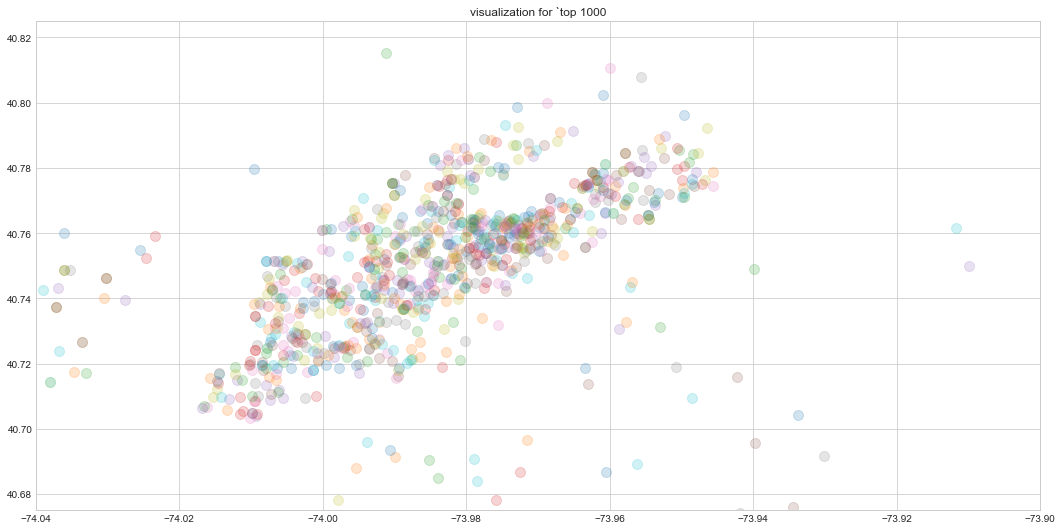

In [74]:
plt.figure(figsize=(18,9))
for row in df[:1000].itertuples():
    lon_x=row.Lon
    lat_y=row.Lat
    plt.scatter(lon_x,lat_y,alpha=0.2,s=100)
    
plt.axis([-74.04,-73.90,40.675,40.825])
plt.title("visualization for `top 1000")
plt.show()

In [67]:
groupByKeysDate = df['Date']
df.Date.value_counts().sort_index()
dfAggValues = pd.DataFrame(df.Date.value_counts().sort_index().reset_index())
dfAggValues = dfAggValues.rename(columns={'index':'Date','Date':'Count'})
dfAggValues.columns

Index([u'Date', u'Count'], dtype='object')

In [68]:
dfAggValues['Index_Weekday'] = pd.to_datetime(dfAggValues['Date'])
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
dfAggValues['Index_Weekday'] = dfAggValues['Index_Weekday'].dt.dayofweek
dfAggValues['Weekday'] = dfAggValues['Index_Weekday'].apply(lambda x: days[x])

In [69]:
dfAggValues

,Date,Count,Index_Weekday,Weekday
0,05/01/2014,23375,3,Thursday
1,05/02/2014,24235,4,Friday
2,05/03/2014,22234,5,Saturday
3,05/04/2014,13918,6,Sunday
4,05/05/2014,17859,0,Monday
5,05/06/2014,19300,1,Tuesday
6,05/07/2014,21891,2,Wednesday
7,05/08/2014,27513,3,Thursday
8,05/09/2014,26385,4,Friday
9,05/10/2014,22550,5,Saturday


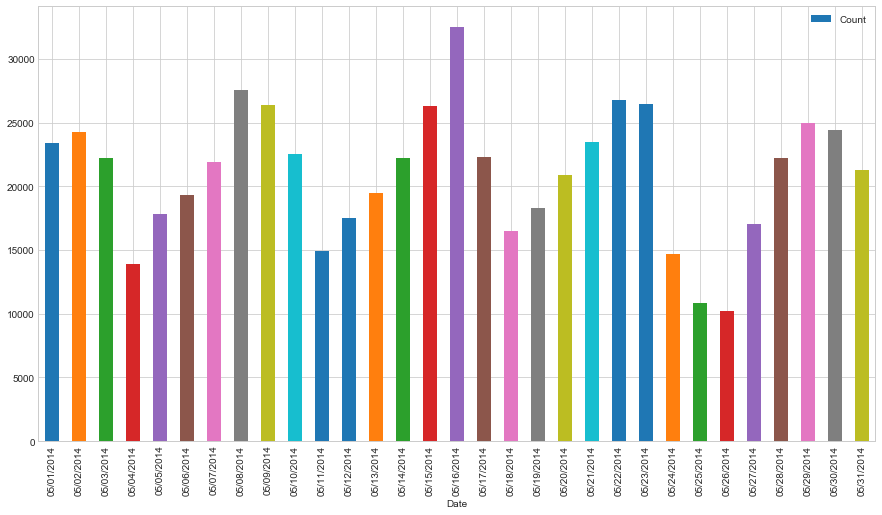

In [70]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (15, 8)
# Count of the pickups based on the month
dfAggValues.plot.bar(x='Date', y='Count')

In [76]:
dfAggValues = dfAggValues.merge(dfWeather, on='Date', how='left')

In [77]:
dfAggValues.head()

,Date,Count,Index_Weekday,Weekday,Temp,Conditions
0,05/01/2014,23375,3,Thursday,65,Unfavorable
1,05/02/2014,24235,4,Friday,63,Normal
2,05/03/2014,22234,5,Saturday,63,Unfavorable
3,05/04/2014,13918,6,Sunday,60,Normal
4,05/05/2014,17859,0,Monday,60,Normal


In [78]:
dfAvgValuesMultiGroup = pd.DataFrame(dfAggValues.groupby(['Weekday', 'Conditions'], as_index=False)['Count'].mean())
dfAvgValuesMultiGroup

,Weekday,Conditions,Count
0,Friday,Normal,24324.000000
1,Friday,Unfavorable,28447.666667
2,Monday,Normal,15961.500000
3,Saturday,Normal,22294.000000
4,Saturday,Unfavorable,20174.000000
5,Sunday,Normal,13755.666667
6,Sunday,Unfavorable,14901.000000
7,Thursday,Normal,24930.000000
8,Thursday,Unfavorable,25997.750000
9,Tuesday,Normal,19165.500000


In [79]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapDays = {day: i for i, day in enumerate(days)}
key = dfAvgValuesMultiGroup['Weekday'].map(mapDays)
key
dfAvgValuesMultiGroup = dfAvgValuesMultiGroup.iloc[key.argsort()].set_index('Weekday')
dfAvgValuesMultiGroup

,Conditions,Count
Weekday,,
Monday,Normal,15961.500000
Tuesday,Normal,19165.500000
Wednesday,Normal,22464.250000
Thursday,Normal,24930.000000
Thursday,Unfavorable,25997.750000
Friday,Normal,24324.000000
Friday,Unfavorable,28447.666667
Saturday,Normal,22294.000000
Saturday,Unfavorable,20174.000000


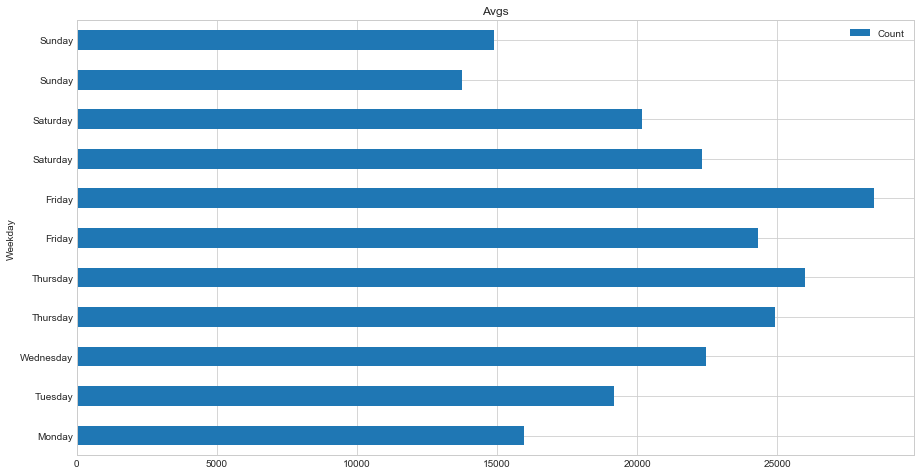

In [80]:

dfAvgValuesMultiGroup.plot(kind='barh', title='Avgs')

In [81]:
df1 = dfAvgValuesMultiGroup.reset_index()
df1 = df1.pivot_table('Count', ['Weekday'], 'Conditions')
df1

Conditions,Normal,Unfavorable
Weekday,,
Friday,24324.000000,28447.666667
Monday,15961.500000,NaN
Saturday,22294.000000,20174.000000
Sunday,13755.666667,14901.000000
Thursday,24930.000000,25997.750000
Tuesday,19165.500000,NaN
Wednesday,22464.250000,NaN


In [82]:
df1 = df1.reset_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapDays = {day: i for i, day in enumerate(days)}
key = df1['Weekday'].map(mapDays)
key
df1 = df1.iloc[key.argsort()].set_index('Weekday')

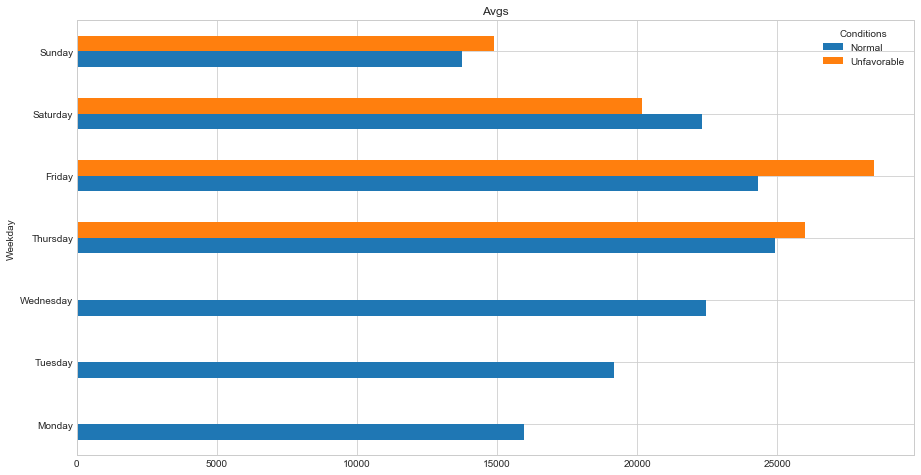

In [83]:
df1.plot(kind='barh', title='Avgs')